## 1. 필요 Library 설치

In [1]:
!pip install beautifulsoup4

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [108]:
!pip install pillow

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [110]:
!pip install wordcloud

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [1]:
!pip install matplotlib

## 2. 실행 코드

### (1) 라이브러리 불러오기

In [1]:
from bs4 import BeautifulSoup
from wordcloud import WordCloud
from PIL import Image

import pandas as pd
import numpy as np
import random
import requests
import re

import matplotlib.pyplot as plt
from matplotlib import font_manager

### (2) 네이버 종목 토론방 긁어오기

In [22]:
def stock_discussion_room(stock_code, pages):
    
    opinion_date_total = []
    opinion_total = []
    chanti = []
    anti = []
    
    r = re.compile(r'\d{4}.\d{2}.\d{2}')
    
    for i in range(pages) :
        
        url = 'https://finance.naver.com/item/board.nhn?code=' + stock_code + '&page=' + str(i+1)
        response = requests.get(url)
        html = response.text
        soup = BeautifulSoup(html, 'html.parser')
        opinion = soup.select('.title')
        opinion_date = []
        
        for date in soup.find_all('span') : 
            match = r.search(date.text)
            
            if match != None :
                opinion_date.append(match.group())

        opinion_date = opinion_date[-20:]
        
        for value in opinion_date : 
            opinion_date_total.append(value)
        
        for i in range(20) :    
            opinion_total.append(opinion[i].find('a')['title'])
                   
        for i, finger in enumerate(soup.find_all('strong')) :
            
            if i in np.arange(2,42, step = 2) :     
                chanti.append(finger.text)

            elif i in np.arange(3,42, step = 2) :
                anti.append(finger.text)
    
    return opinion_date_total, opinion_total, chanti, anti

## 종목코드
 - 삼성전자 : 005930
 - 셀트리온 : 068270
 - 에이치엘비 : 028300
 - 젬백스 : 082270
 - 메드팩토 : 235980
 - 플리토 : 300080
 - 화신테크 : 086250

In [23]:
opinion_date_total, opinion_total, chanti, anti = stock_discussion_room('235980', 100)

In [24]:
df = pd.DataFrame({'날짜' : opinion_date_total, '토론제목' : opinion_total, '찬성' : chanti, '반대' : anti})

In [25]:
df['날짜'].unique()

array(['2019.12.31', '2019.12.30', '2019.12.29', '2019.12.28',
       '2019.12.27', '2019.12.26', '2019.12.25', '2019.12.24',
       '2019.12.23', '2019.12.22', '2019.12.21', '2019.12.20',
       '2019.12.19'], dtype=object)

In [26]:
df.head()

,날짜,토론제목,찬성,반대
0,2019.12.31,메드팩토가 주목받는 이유,0,0
1,2019.12.31,목요일 10시에 개장,1,0
2,2019.12.31,오늘 휴장이여. 장난에 당하지말고,1,2
3,2019.12.31,아니..장언제,2,2
4,2019.12.31,메드팩토..,1,3


### (3) 인간지표 구하기

In [27]:
df['인간지표'] = np.nan
for i in range(df.shape[0]) :
    if int(df['찬성'][i]) == int(df['반대'][i]) :
        df['인간지표'][i] = '중립'
    elif int(df['찬성'][i]) > int(df['반대'][i]) :
        df['인간지표'][i] = '찬티'
    elif int(df['찬성'][i]) < int(df['반대'][i]) :
        df['인간지표'][i] = '안티'
df

C:\Users\woong\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\woong\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,날짜,토론제목,찬성,반대,인간지표
0,2019.12.31,메드팩토가 주목받는 이유,0,0,중립
1,2019.12.31,목요일 10시에 개장,1,0,찬티
2,2019.12.31,오늘 휴장이여. 장난에 당하지말고,1,2,안티
3,2019.12.31,아니..장언제,2,2,중립
4,2019.12.31,메드팩토..,1,3,안티
5,2019.12.31,오늘 왜케 빠지냐,3,2,찬티
6,2019.12.31,오늘 언제열림?,2,1,찬티
7,2019.12.31,시외장난 아니네,1,1,중립
8,2019.12.31,웃기는게,1,1,중립
9,2019.12.31,장 늦게 열리니 지루하네,0,3,안티


### (4) 워드클라우드 살펴보기

In [28]:
contents = " "
for content in df['토론제목'] : 
    contents = contents + " " + content
contents


'  메드팩토가 주목받는 이유 목요일 10시에 개장 오늘 휴장이여. 장난에 당하지말고 아니..장언제 메드팩토.. 오늘 왜케 빠지냐 오늘 언제열림? 시외장난 아니네 웃기는게 장 늦게 열리니 지루하네 임상 최다 9건진행  존버 갑니다  김성진박사와 메드팩토~~~~~ 새해복 많이 받으세요 일본,미국은 사상최고치갱신 바이오 대장급으로 올라설 메드팩토 갈수록 물량은 줄어든다 테라셈과 함께 초 대박주 메드팩토 여러분 상한가 한번은 맞아야지 네이버에  호구들이많다는것을 오늘 인증했군~ 공모가..밑으로..눌러..놓고..개미들.. 이제 겨우 공모가 위 안착 근데 오늘 털리는 흑우는 뭐꼬? 언늠이 장난질이노? 이주식 놓치지마세요 외인이 엄청 팔았네. 신입들만 보고 숙지하삼 다음주 보고 들어가야겠다. 종가에 200주만 들어가야겠다 조만간 꼴랑3%에 호들갑이냐 바이오 폭등의 대장주다 직이네;; 절대안삼 존버해라 시총1조원세팅했다 40만원까지 간다 야 바이오주는 상황보고 들어가는게 훨 나아 음.. 목표3십만 믿고 기다리면 간다 찌라시로.. 털렸다 한강간다 거래 죽인다.. 거래량이 늘어나네 파니오르네 10만원? 가만히 좀 가지고 있어봐요  좀... 쫄아서 조금 손절보고팔았는데 뭐 알고 적어내려가쌌나?ㅋㅋㅋㅋ 오래가지고있을 주식은 아님 ㅋㅋ 찬티들 ㅋㅋ 광고 시간 ~ㅎㅎ 곡소리난다 임상 최다기업이다 코스닥 최초 특징주]메드팩토, 대규모 기술이전 가능성 ↑…CAR-T 효과 높여줄 블록버스터 안티들은 싸게 사고파 안티하는겁니다 후반전에 쭉쭉 터네 ㅋㅋㅋ 쫄지마라 5만원 넘어 10만원간다 곡소리 나네 ㅋㅋㅋ 나도 다이한다 쫄리믄 개잡주는 구경하는 겁니다 또사면 물린다. 기관 외인들 물량 떠넘기기  추매금지 챠트볼줄모르냐? 투자주체봐라 외인 살짝 올리고 이익실현 매물 또는 개미 떨어뜨리기 후 내일도 상승간다 46000원 물린분 있음?ㅎ 무너지면 39000까지 간다 3%에 웬 호들갑이고 시총1조가자 개디랄? 설거지 당한건가? 시총 4천억 짜린데 ㄷㄷ 캬~~ㅋㅋㅋㅋㅋㅋㅋㅋ 귀신같이 빠지네 ㅋㅋㅋㅋ

In [29]:
stock_img = Image.open('C:/Users/woong/Desktop/Youtube Contents/[Episode2] 네이버 종목토론방 찬티 vs 안티 인간지표별 주가 변동/메드팩토.png')
mask = Image.new("RGB", stock_img.size, (255,255,255))
mask.paste(stock_img)
mask = np.array(mask)

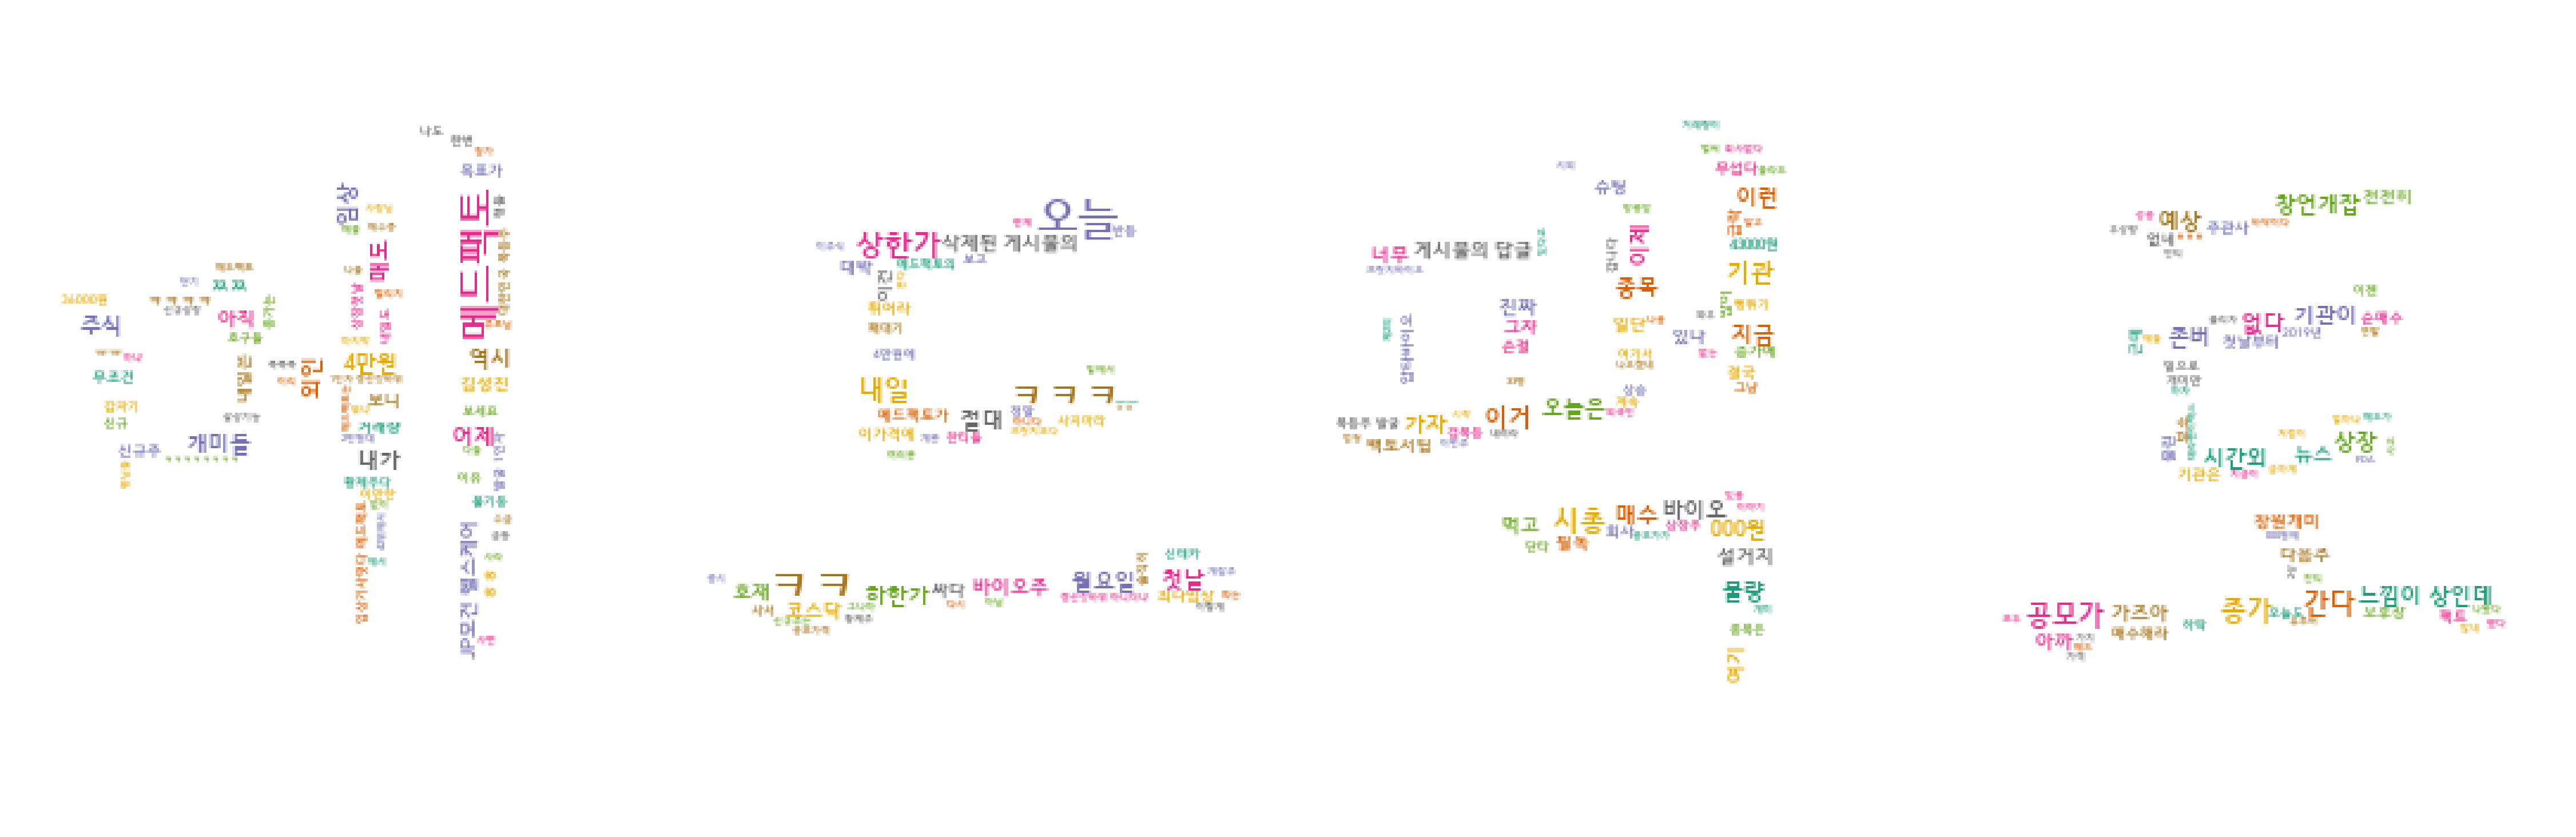

In [30]:
plt.figure(figsize = (80,30))
wc = WordCloud(font_path='C:\\Windows\\Fonts\\HANDotumB.ttf', background_color="white", colormap = "Dark2_r",
               max_words=2000, mask=mask, max_font_size=300, random_state=42)
               
wc.generate_from_text(contents)

plt.imshow(wc)
plt.axis("off")
plt.savefig('WC_메드팩토.png')

### (5) 인간지표 별 주가 그래프 그리기

In [31]:
df_test = df[['날짜', '인간지표']]
df_dummies = pd.get_dummies(df_test['인간지표'])
df_hodu = pd.concat([df_test['날짜'], df_dummies], axis = 1)
df_hodu = df_hodu.groupby('날짜').sum()

In [32]:
df_hodu.head()

,안티,중립,찬티
날짜,,,
2019.12.19,98.0,250.0,323.0
2019.12.20,63.0,90.0,156.0
2019.12.21,0.0,5.0,18.0
2019.12.22,7.0,2.0,10.0
2019.12.23,52.0,38.0,67.0


In [33]:
def daily_stock_close(stock_code):
    
    daily_close = []
    date = []
    
    url = 'https://finance.naver.com/item/frgn.nhn?code=' + stock_code
    response = requests.get(url)
    html = response.text
    soup = BeautifulSoup(html, 'html.parser')
    
    for i in range(3,len(soup.select('table.type2')[1].select('tr'))) :
        
        try :
            daily_close.append(soup.select('table.type2')[1].select('tr')[i].select('td')[1].text.replace(',' , ''))
            date.append(soup.select('table.type2')[1].select('tr')[i].select('td')[0].text)
            
        except IndexError :
            continue
        
    return date, daily_close

## 종목코드
 - 삼성전자 : 005930
 - 셀트리온 : 068270
 - 에이치엘비 : 028300
 - 젬백스 : 082270
 - 메드팩토 : 235980
 - 플리토 : 300080
 - 화신테크 : 086250

In [34]:
date, daily_close = daily_stock_close("235980")

In [35]:
df_close = pd.DataFrame({"날짜" : date, "종가" : daily_close})

In [36]:
df_close.head()

,날짜,종가
0,2019.12.30,44250
1,2019.12.27,42600
2,2019.12.26,38000
3,2019.12.24,35000
4,2019.12.23,36200


In [37]:
df = pd.merge(df_close, df_hodu, how = 'right', on = '날짜')

In [38]:
df.sort_values(['날짜'], ascending=True, inplace=True)

In [39]:
df.dropna(axis=0, inplace=True)
df.head()

,날짜,종가,안티,중립,찬티
6,2019.12.19,35900,98.0,250.0,323.0
5,2019.12.20,35000,63.0,90.0,156.0
4,2019.12.23,36200,52.0,38.0,67.0
3,2019.12.24,35000,42.0,56.0,61.0
2,2019.12.26,38000,36.0,41.0,61.0


In [43]:
df['종가'] = df['종가'].astype(int)

In [40]:
font_list = font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
print('사용가능한 TTF 폰트 개수:', len(font_list))
font_list[:10] 

사용가능한 TTF 폰트 개수: 745


['C:\\Windows\\Fonts\\FRAHV.TTF',
 'C:\\WINDOWS\\Fonts\\HMFMOLD.TTF',
 'C:\\Windows\\Fonts\\ROCKEB.TTF',
 'C:\\Windows\\Fonts\\IMPRISHA.TTF',
 'C:\\Windows\\Fonts\\Candaraz.ttf',
 'C:\\WINDOWS\\Fonts\\LTYPEO.TTF',
 'C:\\Windows\\Fonts\\segoeuil.ttf',
 'C:\\Windows\\Fonts\\BROADW.TTF',
 'C:\\WINDOWS\\Fonts\\BSSYM7.TTF',
 'C:\\Windows\\Fonts\\javatext.ttf']

In [41]:
font_fname = 'C:\\Windows\\Fonts\\HANDotumB.ttf'
font_family = font_manager.FontProperties(fname=font_fname).get_name()
plt.rcParams["font.family"] = font_family

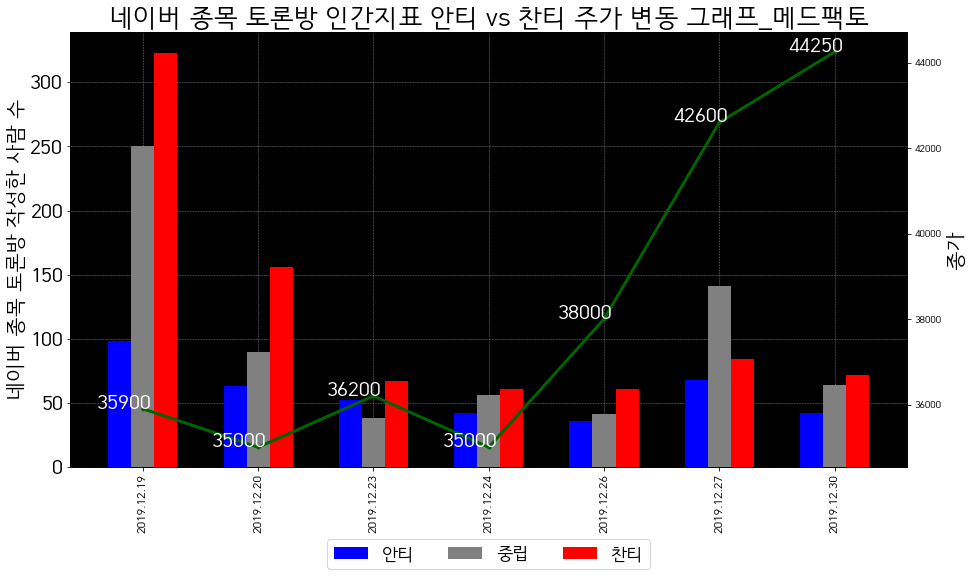

In [44]:
x = np.arange(len(df['날짜']))

fig, ax = plt.subplots(figsize=(15,8))
plt.bar(x+-0.2, df['안티'],width=0.2, label = '안티', color = 'blue')
plt.bar(x, df['중립'],width=0.2,  label = '중립', color = 'gray')
plt.bar(x+0.2, df['찬티'],width=0.2, label = '찬티', color = 'red')
plt.xticks(x, df['날짜'], fontsize='12', rotation = 90)
plt.title('네이버 종목 토론방 인간지표 안티 vs 찬티 주가 변동 그래프_메드팩토', fontsize='25')
plt.yticks(fontsize=20)
ax.set_ylabel('네이버 종목 토론방 작성한 사람 수', fontsize = '20')
ax.patch.set_facecolor('black')
ax.set_axisbelow(True)
ax.xaxis.grid(True, color='gray', linestyle='dashed', linewidth=0.5)
ax.yaxis.grid(True, color='gray', linestyle='dashed', linewidth=0.5)
ax.legend(bbox_to_anchor=(0.5, -0.2), loc = 'center', ncol = 3, fontsize=17)


ax2 = ax.twinx()
ax2.set_ylabel('종가', fontsize = 20)
ax2.plot(df['종가'].values, linestyle='-', marker='.', linewidth=3.0, color = 'darkgreen')

for i, x in enumerate(x):
    plt.text(x-0.4, df['종가'].values[i], df['종가'].values[i], fontsize=20, color ='white')

plt.savefig('인간지표 주가 변동 그래프_메드팩토.png')
plt.show()